Import all required libraries

In [36]:
import tensorflow as tf

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


Download data

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

--2022-01-14 03:40:02--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M  25.7MB/s    in 2.6s    

2022-01-14 03:40:05 (25.7 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __MACO

  inflating: cats_and_dogs/train/dogs/dog.216.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.216.jpg  
  inflating: cats_and_dogs/train/dogs/dog.570.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.570.jpg  
  inflating: cats_and_dogs/train/dogs/dog.564.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.564.jpg  
  inflating: cats_and_dogs/train/dogs/dog.202.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.202.jpg  
  inflating: cats_and_dogs/train/dogs/dog.558.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.558.jpg  
  inflating: cats_and_dogs/train/dogs/dog.969.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.969.jpg  
  inflating: cats_and_dogs/train/dogs/dog.955.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.955.jpg  
  inflating: cats_and_dogs/train/dogs/dog.941.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.941.jpg  
  inflating: cats_and_dogs/train/dogs/dog.799.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.305.jpg  
  inflating: cats_and_dogs/train/dogs/dog.463.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.463.jpg  
  inflating: cats_and_dogs/train/dogs/dog.339.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.339.jpg  
  inflating: cats_and_dogs/train/dogs/dog.488.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.488.jpg  
  inflating: cats_and_dogs/train/dogs/dog.113.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.113.jpg  
  inflating: cats_and_dogs/train/dogs/dog.675.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.675.jpg  
  inflating: cats_and_dogs/train/dogs/dog.661.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.661.jpg  
  inflating: cats_and_dogs/train/dogs/dog.107.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.107.jpg  
  inflating: cats_and_dogs/train/dogs/dog.649.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.649.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/dogs/dog.673.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.673.jpg  
  inflating: cats_and_dogs/train/dogs/dog.840.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.840.jpg  
  inflating: cats_and_dogs/train/dogs/dog.698.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.698.jpg  
  inflating: cats_and_dogs/train/dogs/dog.93.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.93.jpg  
  inflating: cats_and_dogs/train/dogs/dog.87.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.87.jpg  
  inflating: cats_and_dogs/train/dogs/dog.854.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.854.jpg  
  inflating: cats_and_dogs/train/dogs/dog.868.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.868.jpg  
  inflating: cats_and_dogs/train/dogs/dog.869.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.869.jpg  
  inflating: cats_and_dogs/train/dogs/dog.855.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.534.jpg  
  inflating: cats_and_dogs/train/dogs/dog.252.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.252.jpg  
  inflating: cats_and_dogs/train/dogs/dog.905.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.905.jpg  
  inflating: cats_and_dogs/train/dogs/dog.911.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.911.jpg  
  inflating: cats_and_dogs/train/dogs/dog.939.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.939.jpg  
  inflating: cats_and_dogs/train/dogs/dog.722.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.722.jpg  
  inflating: cats_and_dogs/train/dogs/dog.736.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.736.jpg  
  inflating: cats_and_dogs/train/dogs/dog.720.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.720.jpg  
  inflating: cats_and_dogs/train/dogs/dog.734.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.734.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/dogs/dog.490.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.490.jpg  
  inflating: cats_and_dogs/train/dogs/dog.484.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.484.jpg  
  inflating: cats_and_dogs/train/dogs/dog.66.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.66.jpg  
  inflating: cats_and_dogs/train/dogs/dog.679.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.679.jpg  
  inflating: cats_and_dogs/train/dogs/dog.72.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.72.jpg  
  inflating: cats_and_dogs/train/dogs/dog.651.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.651.jpg  
  inflating: cats_and_dogs/train/dogs/dog.889.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.889.jpg  
  inflating: cats_and_dogs/train/dogs/dog.137.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.137.jpg  
  inflating: cats_and_dogs/train/dogs/dog.123.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.445.jpg  
  inflating: cats_and_dogs/train/dogs/dog.479.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.479.jpg  
  inflating: cats_and_dogs/train/dogs/dog.280.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.280.jpg  
  inflating: cats_and_dogs/train/dogs/dog.294.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.294.jpg  
  inflating: cats_and_dogs/train/dogs/dog.525.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.525.jpg  
  inflating: cats_and_dogs/train/dogs/dog.243.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.243.jpg  
  inflating: cats_and_dogs/train/dogs/dog.257.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.257.jpg  
  inflating: cats_and_dogs/train/dogs/dog.531.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.531.jpg  
  inflating: cats_and_dogs/train/dogs/dog.519.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.519.jpg  
  inflating: cats

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.384.jpg  
  inflating: cats_and_dogs/train/dogs/dog.637.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.637.jpg  
  inflating: cats_and_dogs/train/dogs/dog.151.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.151.jpg  
  inflating: cats_and_dogs/train/dogs/dog.145.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.145.jpg  
  inflating: cats_and_dogs/train/dogs/dog.623.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.623.jpg  
  inflating: cats_and_dogs/train/dogs/dog.28.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.28.jpg  
  inflating: cats_and_dogs/train/dogs/dog.179.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.179.jpg  
  inflating: cats_and_dogs/train/dogs/dog.14.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.14.jpg  
  inflating: cats_and_dogs/train/dogs/dog.192.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.192.jpg  
  inflating: cats_and

  inflating: cats_and_dogs/train/dogs/dog.745.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.745.jpg  
  inflating: cats_and_dogs/train/dogs/dog.976.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.976.jpg  
  inflating: cats_and_dogs/train/dogs/dog.962.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.962.jpg  
  inflating: cats_and_dogs/train/dogs/dog.792.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.792.jpg  
  inflating: cats_and_dogs/train/dogs/dog.786.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.786.jpg  
  inflating: cats_and_dogs/train/dogs/dog.209.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.209.jpg  
  inflating: cats_and_dogs/train/dogs/dog.553.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.553.jpg  
  inflating: cats_and_dogs/train/dogs/dog.235.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.235.jpg  
  inflating: cats_and_dogs/train/dogs/dog.221.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.399.jpg  
  inflating: cats_and_dogs/train/cats/cat.428.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.428.jpg  
  inflating: cats_and_dogs/train/cats/cat.414.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.414.jpg  
  inflating: cats_and_dogs/train/cats/cat.372.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.372.jpg  
  inflating: cats_and_dogs/train/cats/cat.366.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.366.jpg  
  inflating: cats_and_dogs/train/cats/cat.400.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.400.jpg  
  inflating: cats_and_dogs/train/cats/cat.831.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.831.jpg  
  inflating: cats_and_dogs/train/cats/cat.825.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.825.jpg  
  inflating: cats_and_dogs/train/cats/cat.819.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.819.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/cats/cat.361.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.361.jpg  
  inflating: cats_and_dogs/train/cats/cat.407.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.407.jpg  
  inflating: cats_and_dogs/train/cats/cat.229.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.229.jpg  
  inflating: cats_and_dogs/train/cats/cat.567.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.567.jpg  
  inflating: cats_and_dogs/train/cats/cat.201.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.201.jpg  
  inflating: cats_and_dogs/train/cats/cat.215.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.215.jpg  
  inflating: cats_and_dogs/train/cats/cat.573.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.573.jpg  
  inflating: cats_and_dogs/train/cats/cat.598.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.598.jpg  
  inflating: cats_and_dogs/train/cats/cat.981.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.102.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.102.jpg  
  inflating: cats_and_dogs/train/cats/cat.41.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.41.jpg  
  inflating: cats_and_dogs/train/cats/cat.894.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.894.jpg  
  inflating: cats_and_dogs/train/cats/cat.880.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.880.jpg  
  inflating: cats_and_dogs/train/cats/cat.658.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.658.jpg  
  inflating: cats_and_dogs/train/cats/cat.55.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.55.jpg  
  inflating: cats_and_dogs/train/cats/cat.659.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.659.jpg  
  inflating: cats_and_dogs/train/cats/cat.881.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.881.jpg  
  inflating: cats_and_dogs/train/cats/cat.54.jpg  
  inflating: __MACOSX/cats_and_do

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.468.jpg  
  inflating: cats_and_dogs/train/cats/cat.497.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.497.jpg  
  inflating: cats_and_dogs/train/cats/cat.483.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.483.jpg  
  inflating: cats_and_dogs/train/cats/cat.520.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.520.jpg  
  inflating: cats_and_dogs/train/cats/cat.246.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.246.jpg  
  inflating: cats_and_dogs/train/cats/cat.252.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.252.jpg  
  inflating: cats_and_dogs/train/cats/cat.534.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.534.jpg  
  inflating: cats_and_dogs/train/cats/cat.508.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.508.jpg  
  inflating: cats_and_dogs/train/cats/cat.285.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.285.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/cats/cat.732.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.732.jpg  
  inflating: cats_and_dogs/train/cats/cat.726.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.726.jpg  
  inflating: cats_and_dogs/train/cats/cat.295.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.295.jpg  
  inflating: cats_and_dogs/train/cats/cat.281.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.281.jpg  
  inflating: cats_and_dogs/train/cats/cat.530.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.530.jpg  
  inflating: cats_and_dogs/train/cats/cat.256.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.256.jpg  
  inflating: cats_and_dogs/train/cats/cat.242.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.242.jpg  
  inflating: cats_and_dogs/train/cats/cat.524.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.524.jpg  
  inflating: cats_and_dogs/train/cats/cat.518.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.794.jpg  
  inflating: cats_and_dogs/train/cats/cat.743.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.743.jpg  
  inflating: cats_and_dogs/train/cats/cat.757.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.757.jpg  
  inflating: cats_and_dogs/train/cats/cat.582.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.582.jpg  
  inflating: cats_and_dogs/train/cats/cat.596.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.596.jpg  
  inflating: cats_and_dogs/train/cats/cat.569.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.569.jpg  
  inflating: cats_and_dogs/train/cats/cat.541.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.541.jpg  
  inflating: cats_and_dogs/train/cats/cat.227.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.227.jpg  
  inflating: cats_and_dogs/train/cats/cat.233.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.233.jpg  
  inflating: cats

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.369.jpg  
  inflating: cats_and_dogs/train/cats/cat.180.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.180.jpg  
  inflating: cats_and_dogs/train/cats/cat.194.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.194.jpg  
  inflating: cats_and_dogs/train/cats/cat.802.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.802.jpg  
  inflating: cats_and_dogs/train/cats/cat.816.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.816.jpg  
  inflating: cats_and_dogs/train/cats/cat.625.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.625.jpg  
  inflating: cats_and_dogs/train/cats/cat.28.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.28.jpg  
  inflating: cats_and_dogs/train/cats/cat.143.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.143.jpg  
  inflating: cats_and_dogs/train/cats/cat.157.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.157.jpg  
  inflating: cats_a

  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2259.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2271.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2271.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2265.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2265.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2073.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2073.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2067.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2067.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2098.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2098.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2107.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2107.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2113.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2113.jpg  
  inflating: cats_and_dogs/validation/dogs

  inflating: cats_and_dogs/validation/dogs/dog.2198.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2198.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2359.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2359.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2417.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2417.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2371.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2371.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2365.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2365.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2403.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2403.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2364.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2364.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2402.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2025.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2179.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2179.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2145.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2145.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2151.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2151.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2186.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2186.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2192.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2192.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2409.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2409.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2421.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2421.jpg  
  inflating: cats_and_dogs/validation/dogs

  inflating: cats_and_dogs/validation/dogs/dog.2252.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2252.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2246.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2246.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2278.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2278.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2250.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2250.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2244.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2244.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2293.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2293.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2287.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2287.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2052.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/cats/cat.2296.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2296.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2282.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2282.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2255.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2255.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2241.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2241.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2269.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2269.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2094.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2094.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2080.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2080.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2057.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2222.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2034.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2034.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2020.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2020.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2008.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2008.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2036.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2036.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2022.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2022.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2208.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2208.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2234.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2234.jpg  
  inflating: cats_and_dogs/validation/cats

  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2217.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2203.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2203.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2015.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2015.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2001.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2001.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2029.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2029.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2017.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2017.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2003.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2003.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2229.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2229.jpg  
  inflating: cats_and_dogs/validation/cats

  inflating: cats_and_dogs/validation/cats/cat.2110.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2110.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2104.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2104.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2448.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2448.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2312.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2312.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2474.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2474.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2460.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2460.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2306.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2306.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2299.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

## Load data

Create image generators for each of the three image data sets (train, validation, test). Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.
For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size ((`IMG_HEIGHT`, `IMG_WIDTH`)), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.
After you run the code, the output should look like this:

```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

In [47]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
# -1 because of DS_store
total_train = sum([len(files) for r, d, files in os.walk(train_dir)]) - 1
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)]) - 1
total_test = len(os.listdir(test_dir)) - 1

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

# train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode="binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode="binary"
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), classes=['test'],
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## Explore data

The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running the cell below will plot five random training images.

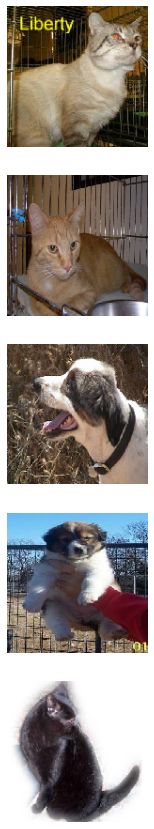

In [48]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
        for img, ax in zip( images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        for img, probability, ax in zip( images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            if probability > 0.5:
                ax.set_title("%.2f" % (probability*100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Data augmentation

Recreate the `train_image_generator` using `ImageDataGenerator`.
Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.
Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.

In [49]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)

You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


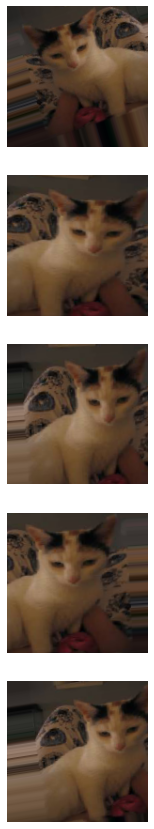

In [50]:
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.
Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [51]:
model = Sequential()

# Convolutions
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [40]:
steps_per_epoch = int(np.ceil(1. * total_train / batch_size))
validation_steps   = int(np.ceil(1. * total_val / batch_size))

print(steps_per_epoch, validation_steps)

16 8


In [52]:
history = model.fit(
    x=train_data_gen, 
#     steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    validation_data = val_data_gen,
#     validation_steps=validation_steps
)

model.save('cat_dog_model.h5')

2022-01-14 15:32:07.976393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 13 of 16
2022-01-14 15:32:09.891158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 16 steps, validate for 8 steps
Epoch 1/15


2022-01-14 15:32:21.613423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 15 of 16
2022-01-14 15:32:22.058582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 176s 11s/step - loss: 2.4436 - accuracy: 0.4910 - val_loss: 0.8377 - val_accuracy: 0.5010
Epoch 2/15


2022-01-14 15:35:17.112449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 15:35:18.298401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 173s 11s/step - loss: 0.6918 - accuracy: 0.5510 - val_loss: 0.6837 - val_accuracy: 0.5110
Epoch 3/15


2022-01-14 15:38:10.207906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 15:38:11.387832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 279s 17s/step - loss: 0.6699 - accuracy: 0.5740 - val_loss: 0.6457 - val_accuracy: 0.6090
Epoch 4/15


2022-01-14 15:43:08.569962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 13 of 16
2022-01-14 15:43:09.390391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 15:43:10.203399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 15 of 16
2022-01-14 15:43:10.669074: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 196s 12s/step - loss: 0.6623 - accuracy: 0.5875 - val_loss: 0.6542 - val_accuracy: 0.5900
Epoch 5/15


2022-01-14 15:46:05.913951: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 12 of 16
2022-01-14 15:46:08.635041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 177s 11s/step - loss: 0.6697 - accuracy: 0.5655 - val_loss: 0.6338 - val_accuracy: 0.6190
Epoch 6/15


2022-01-14 15:49:03.060308: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 13 of 16
2022-01-14 15:49:05.099983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 177s 11s/step - loss: 0.6536 - accuracy: 0.5935 - val_loss: 0.6283 - val_accuracy: 0.6300
Epoch 7/15


2022-01-14 15:52:00.783465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 13 of 16
2022-01-14 15:52:02.814080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 179s 11s/step - loss: 0.6472 - accuracy: 0.6010 - val_loss: 0.6402 - val_accuracy: 0.6060
Epoch 8/15


2022-01-14 15:54:58.713300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 15:54:59.905247: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 173s 11s/step - loss: 0.6490 - accuracy: 0.6280 - val_loss: 0.6425 - val_accuracy: 0.6090
Epoch 9/15


2022-01-14 15:57:52.331650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 15:57:53.535305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 173s 11s/step - loss: 0.6372 - accuracy: 0.6225 - val_loss: 0.6447 - val_accuracy: 0.6050
Epoch 10/15


2022-01-14 16:00:45.494388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 16:00:46.705381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 183s 11s/step - loss: 0.6347 - accuracy: 0.6350 - val_loss: 0.6146 - val_accuracy: 0.6520
Epoch 11/15


2022-01-14 16:03:48.563182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 13 of 16
2022-01-14 16:03:50.618653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 246s 15s/step - loss: 0.6252 - accuracy: 0.6550 - val_loss: 0.6041 - val_accuracy: 0.6620
Epoch 12/15


2022-01-14 16:07:54.025348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 16:07:55.212331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 175s 11s/step - loss: 0.6311 - accuracy: 0.6310 - val_loss: 0.6209 - val_accuracy: 0.6300
Epoch 13/15


2022-01-14 16:10:49.106111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 16:10:50.293091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 175s 11s/step - loss: 0.6172 - accuracy: 0.6575 - val_loss: 0.6268 - val_accuracy: 0.6290
Epoch 14/15


2022-01-14 16:13:44.739744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 16:13:45.935823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 177s 11s/step - loss: 0.6068 - accuracy: 0.6700 - val_loss: 0.6238 - val_accuracy: 0.6200
Epoch 15/15


2022-01-14 16:16:41.601036: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 14 of 16
2022-01-14 16:16:42.821837: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


16/16 [==============================] - 176s 11s/step - loss: 0.6158 - accuracy: 0.6615 - val_loss: 0.6163 - val_accuracy: 0.6410


Run the next cell to visualize the accuracy and loss of the model

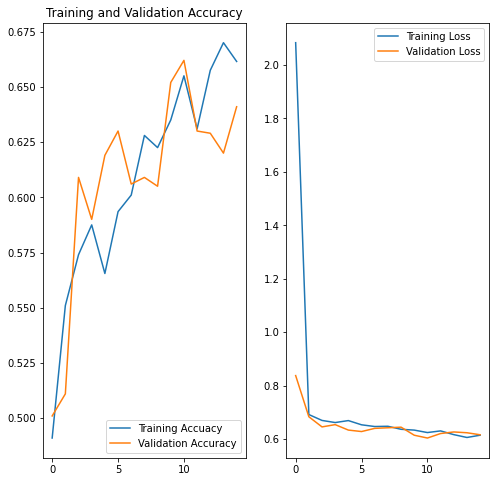

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuacy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [54]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

array([0.477919  , 0.29969352, 0.37951946, 0.838887  , 0.5859995 ,
       0.48365358, 0.7360281 , 0.44908732, 0.37631786, 0.93963736,
       0.6958669 , 0.71990323, 0.3665365 , 0.23924541, 0.5390042 ,
       0.6369635 , 0.64090157, 0.85971606, 0.71201205, 0.53579986,
       0.31244674, 0.76002514, 0.33095282, 0.77887475, 0.7681581 ,
       0.5973965 , 0.89643186, 0.46611497, 0.48925656, 0.5968642 ,
       0.6787801 , 0.39399868, 0.82950985, 0.997822  , 0.48590043,
       0.6580595 , 0.9823619 , 0.73540944, 0.62808377, 0.5136379 ,
       0.49958417, 0.52503794, 0.8909844 , 0.47124773, 0.60451365,
       0.45437664, 0.4274788 , 0.5694481 , 0.21454754, 0.53602153],
      dtype=float32)

Run this final cell to see if you passed the challenge or if you need to keep tryi

In [56]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
        correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {int(round(percentage_identified, 2)*100)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 62% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
